First let's see, what our images look like..

In [4]:
%matplotlib inline
import matplotlib.pyplot as plt
import os
import random
import pandas as pd
import numpy as np
import cv2

In [5]:
data_dir = r'C:\Users\sharm\OneDrive\Desktop\train_DETg9GD'
train = pd.read_csv(os.path.join(data_dir,'train.csv'))

Age :  MIDDLE


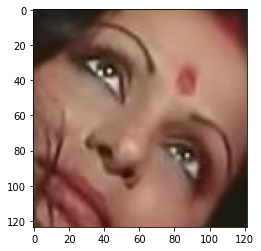

In [6]:
i = random.choice(train.index) #Randomly choosing an image.
img_name = train.ID[i] 
img = cv2.imread(os.path.join(data_dir,'Train',img_name))
img = cv2.cvtColor(img,cv2.COLOR_RGB2BGR) #Color channels in opencv are BGR rather than 
print('Age : ',train.Class[i])
plt.imshow(img)

Age :  YOUNG


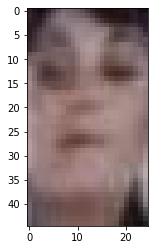

In [7]:
#Let's see another image
i = random.choice(train.index) #Randomly choosing an image.
img_name = train.ID[i] 
img = cv2.imread(os.path.join(data_dir,'Train',img_name))
img = cv2.cvtColor(img,cv2.COLOR_RGB2BGR) #Color channels in opencv are BGR rather than 
print('Age : ',train.Class[i])
plt.imshow(img)

As we can see images are of different sizes, we should resize them to a single size.

In [8]:
#Number of images we have
print(len(train))

19906


In [9]:
#let's first divide the dataset in validation and training set
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(train['ID'],train['Class'], test_size=0.15, random_state=42)    

In [10]:
temp=[]
for image in x_train:
    img_path = os.path.join(data_dir,'Train',image)
    img = cv2.imread(img_path)
    img = cv2.cvtColor(img,cv2.COLOR_RGB2BGR)
    img = cv2.resize(img,(64,64))
    img = img.astype('float')
    temp.append(img)

train_img = np.stack(temp)

In [11]:
temp=[]
for image in x_test:
    img_path = os.path.join(data_dir,'Train',image)
    img = cv2.imread(img_path)
    img = cv2.cvtColor(img,cv2.COLOR_RGB2BGR)
    img = cv2.resize(img,(64,64))
    img = img.astype('float')
    temp.append(img)

test_img = np.stack(temp)

So now we have our training images (train_img) and our validation images (test_img).

In [12]:
#let's normalize these images by dividing them 255.0
train_img = train_img/255.0
test_img = test_img/255.0

This marks the end of our preprocessing.
We have now our training images => train_img, 
Training labels => y_train, 
Test images => test_img and  
Test labels => y_test

In [13]:
#Now we will encode our labels
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
le.fit(y_train)
y_test = le.transform(y_test)
y_train = le.transform(y_train)

In [14]:
import keras
y_train = keras.utils.to_categorical(y_train)
y_test = keras.utils.to_categorical(y_test)

Now we will start with the model.
I'll be using a Convolutional Neural Network.

In [15]:
from keras.models import Sequential 
from keras.layers import Activation, Dense, Conv2D, Flatten, MaxPooling2D, Dropout
from keras import initializers 
from keras import regularizers 
from keras import constraints
from keras import losses 
from keras import optimizers 
from keras import metrics

In [27]:
input_shape = (64,64,3)
model = Sequential()
model.add(Conv2D(64,3,activation='relu',input_shape=input_shape,padding='same'))
model.add(MaxPooling2D(pool_size=(2,2),strides=2))
model.add(Conv2D(128,3,activation='relu',padding='same'))
model.add(MaxPooling2D(pool_size=(2,2),strides=2))
model.add(Conv2D(256,3,activation='relu',padding='same'))
model.add(MaxPooling2D(pool_size=(2,2),strides=2))
model.add(Flatten())
model.add(Dense(2048,activation='relu',kernel_initializer = 'he_uniform',kernel_regularizer = 'l2'))
model.add(Dropout(0.33))
model.add(Dense(1024,activation='relu',kernel_initializer = 'he_uniform',kernel_regularizer = 'l2'))
model.add(Dropout(0.33))
model.add(Dense(256,activation='relu',kernel_initializer = 'he_uniform',kernel_regularizer = 'l2'))
model.add(Dropout(0.33))
model.add(Dense(3,activation='softmax',kernel_initializer = 'he_uniform',kernel_regularizer = 'l2'))
model.compile(optimizer='adam', loss='categorical_crossentropy',metrics = [metrics.categorical_accuracy])
model.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_51 (Conv2D)           (None, 64, 64, 64)        1792      
_________________________________________________________________
max_pooling2d_27 (MaxPooling (None, 32, 32, 64)        0         
_________________________________________________________________
conv2d_52 (Conv2D)           (None, 32, 32, 128)       73856     
_________________________________________________________________
max_pooling2d_28 (MaxPooling (None, 16, 16, 128)       0         
_________________________________________________________________
conv2d_53 (Conv2D)           (None, 16, 16, 256)       295168    
_________________________________________________________________
max_pooling2d_29 (MaxPooling (None, 8, 8, 256)         0         
_________________________________________________________________
flatten_7 (Flatten)          (None, 16384)            

In [28]:
model.fit(train_img,y_train,epochs=20,batch_size=64)

Epoch 1/20
265/265 [==============================] - 302s 1s/step - loss: 4.1406 - categorical_accuracy: 0.5384
Epoch 2/20
265/265 [==============================] - 294s 1s/step - loss: 0.9720 - categorical_accuracy: 0.5424
Epoch 3/20
265/265 [==============================] - 293s 1s/step - loss: 0.9239 - categorical_accuracy: 0.6163
Epoch 4/20
265/265 [==============================] - 292s 1s/step - loss: 0.8679 - categorical_accuracy: 0.6593
Epoch 5/20
265/265 [==============================] - 293s 1s/step - loss: 0.8412 - categorical_accuracy: 0.6708
Epoch 6/20
265/265 [==============================] - 292s 1s/step - loss: 0.8197 - categorical_accuracy: 0.6825
Epoch 7/20
265/265 [==============================] - 292s 1s/step - loss: 0.8049 - categorical_accuracy: 0.6895
Epoch 8/20
265/265 [==============================] - 293s 1s/step - loss: 0.7883 - categorical_accuracy: 0.6982
Epoch 9/20
265/265 [==============================] - 306s 1s/step - loss: 0.7818 - categorical_

71.26 % is really good score, considering most images in the dataset are blurry and of different angles.
Now let's see how does it perform on unseen data.

In [29]:
loss , accuracy = model.evaluate(test_img,y_test)
print('Loss : ',loss,'\nAccuracy : ',accuracy)

94/94 [==============================] - 16s 175ms/step - loss: 0.6861 - categorical_accuracy: 0.7595
Loss :  0.6860707998275757 
Accuracy :  0.7595445513725281


71.63 % accuracy on validation set (previously unseen by the model) is a really good score, and it seems our model is working well and is not overfitting the training set.